# **IMI BIG DATA & AI CASE COMPETITION**

## *By: Hafsa, Cindy, Tahir & Albert*

The following script uses the data from feature engineering to select the best features possible. 

# Initial Set-Up & Import Data <a class="anchor" id="1"></a>

In [64]:
# Import relevent Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import math

# Model Metrics & Data Pre-processing 
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb 

# Imbalance dataset methods
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

# Miscellaneous
from collections import Counter

# Additional Libraries -- Automatic Explanatory Data Analysis
from pandas_profiling import ProfileReport
from IPython.core.display import display, HTML

# Remove warnings (so it doesn't take up space)
import warnings
warnings.filterwarnings('ignore')

# Set seed for repition 
np.random.seed(2022)

In [65]:
# Some settings for making the tables, plots and the report look nicer
sns.set_theme()
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 999)
display(HTML("<style>.container { width:80% !important; }</style>"))
display(HTML("<style>.container { length:100% !important; }</style>")) 

In [66]:
# Read in the data
# Canadian Companies Data
df1 = pd.read_excel("/Users/tahir/Desktop/Fraudit/Datasets/Feature_Engineering_Completed_df1.xlsx")

# General Companies Data
df2 = pd.read_excel("/Users/tahir/Desktop/Fraudit/Datasets/Feature_Engineering_Completed_df2.xlsx")

# Data Dictionary from Canadian Companies Dataset (Although both data dictionaries are the same) 
data_dictionary = pd.read_excel("/Users/tahir/Desktop/Fraudit/Datasets/cmeg_df_case_competition_scrambled_train.xlsx", sheet_name=1)

In [67]:
# Remove the index column which gets added when you export to excel 
df1.drop(["Unnamed: 0"], axis=1, inplace=True)
df2.drop(["Unnamed: 0"], axis=1, inplace=True)

In [5]:
df1.head()

ROW  Corp_Residence_Country_Code  BR Code  CUSTOMER_ID  Final_IG  \
0   5662                            1        5         1576         5   
1  16369                            1        5         4545         7   
2   2326                            0       12          648         8   
3  38131                            0       19        13395         5   
4  36605                            0       19        12998         6   

   B_PLUS_FLAG      EBITDA_Y0      EBITDA_Y1      EBITDA_Y2      EBITDA_Y3  \
0            1  575863.911214  602838.635998  583646.469630  614602.866245   
1            1  599469.364624  615373.028208  612705.047096  512031.899430   
2            1  613829.072017  575020.270272  583630.783425  595256.346525   
3            1  585059.299344  581915.869330  594033.887481  609965.034011   
4            1  605966.227164  593540.797737  575448.556931  512031.899430   

   TOTALASSET_Y0  TOTALASSET_Y1  TOTALASSET_Y2  TOTALASSET_Y3   TOTALDEBT_Y0  \
0  619611.510181  621095.725446  611355.907673  582433.004400  623105.791017   
1  608126.531748  601435.154115  587550.520995  508218.086643  627335.355343   
2  608391.483917  611859.108037  607825.470188  592953.319963  585464.960100   
3  591791.219692  598332.776102  589877.849288  622230.836194  584513.060799   
4  582546.955793  614212.207680  578068.515601  508218.086643  590177.329836   

    TOTALDEBT_Y1   TOTALDEBT_Y2   TOTALDEBT_Y3  TOTALREVENUE_Y0  \
0  596800.177680  600460.033208  598408.339905    611355.411490   
1  611300.879046  572542.268654       0.000000    604626.757034   
2  571781.269380  585642.496712  593575.189122    608591.366569   
3  626767.691011  625743.779183  573802.856646    615999.168162   
4  570997.852457  625971.749956       0.000000    607879.645878   

   TOTALREVENUE_Y1  TOTALREVENUE_Y2  TOTALREVENUE_Y3  CURRENTASSET_Y0  \
0    589592.109008    605336.777910    574789.603998    620745.952718   
1    586282.226249    624691.726730    501716.330148    596315.871786   
2    578175.200440    602523.843620    605501.836474    618999.144319   
3    588623.823558    600443.812695    633589.116171    582358.584899   
4    628042.392612    592671.553802    501716.330148    624481.204725   

   CURRENTASSET_Y1  CURRENTASSET_Y2  CURRENTASSET_Y3  FIXEDASSET_Y0  \
0    621004.600446    614991.732391    604478.517167  609095.636450   
1    609786.889797    620321.870767    507962.639632  577715.935070   
2    614118.293569    592205.828625    593381.268052  578343.317529   
3    612497.219818    606794.985460    589340.181176  621919.270235   
4    620443.236288    584608.020724    507962.639632  581316.994347   

   FIXEDASSET_Y1  FIXEDASSET_Y2  FIXEDASSET_Y3  CURRENTLIABILITY_Y0  \
0  600147.701765  589971.619360  580405.105567        578103.988392   
1  576662.704616  582062.515093  505654.999259        616376.771099   
2  575530.917780  590556.467199  595629.061840        603655.551037   
3  607400.754064  581688.692973  633939.157288        620046.519867   
4  618157.473873  612201.478244  505654.999259        594651.641147   

   CURRENTLIABILITY_Y1  CURRENTLIABILITY_Y2  CURRENTLIABILITY_Y3  \
0        577109.531117        574090.626783        583030.371565   
1        604827.131130        599463.087501        511127.253255   
2        574183.093293        597137.973102        596570.797275   
3        607197.874782        589234.421690        615945.241601   
4        588273.242403        628893.487075        511127.253255   

   NONCURRLIA_Y0  NONCURRLIA_Y1  NONCURRLIA_Y2  NONCURRLIA_Y3  TOTALEQUITY_Y0  \
0  600890.935743  604975.472270  600103.052065  601804.995337   596259.219747   
1  584268.408156  615338.209036  617623.837767  509722.989076   599915.942888   
2  605298.293603  598985.457637  602326.489701  610354.711853   577735.145730   
3  624582.882164  571604.744174  618284.670890  582971.670808   601679.290137   
4  619814.409081  612323.296890  579970.364292  509722.989076   604318.176057   

   TOTALEQUITY_Y1  TOTAL

In [6]:
df2.head()

ROW  Corp_Residence_Country_Code  BR Code  CUSTOMER_ID  Final_IG  \
0  28464                            2        4         8228         8   
1  39693                            3       63        12315         7   
2  19535                           15       13         5504         6   
3   4286                            2        4         1107         8   
4  39621                           59       30        12294         8   

   B_PLUS_FLAG      EBITDA_Y0      EBITDA_Y1      EBITDA_Y2      EBITDA_Y3  \
0            1  365604.767017  341575.264490  368053.254720  370696.187829   
1            1  564307.130704  549358.882217  526488.403994  479901.183851   
2            1  379351.685119  394182.092405  380051.883962  383669.693000   
3            1  363552.396086  371786.373645  371542.067484  365204.228853   
4            1  368530.936855  367450.033454  358297.870364  261365.173485   

   TOTALASSET_Y0  TOTALASSET_Y1  TOTALASSET_Y2  TOTALASSET_Y3   TOTALDEBT_Y0  \
0   3.706175e+05   3.497885e+05   3.485696e+05   3.757753e+05  375510.954405   
1   2.715529e+06   2.232579e+06   2.065349e+06   1.379724e+06  828728.508363   
2   6.441022e+05   6.050513e+05   6.206603e+05   6.305246e+05  425385.779348   
3   3.846639e+05   3.789517e+05   3.551879e+05   3.713978e+05  372174.532867   
4   3.516819e+05   3.563508e+05   3.427291e+05   1.000000e-04  369333.246102   

    TOTALDEBT_Y1   TOTALDEBT_Y2   TOTALDEBT_Y3  TOTALREVENUE_Y0  \
0  372600.077528  360644.686054  373539.595801     3.560748e+05   
1  767078.823898  682225.237404  568955.143988     1.522408e+06   
2  390735.673995  477455.869440  452824.941068     7.995319e+05   
3  371370.256259  377959.226908  344581.947799     3.636668e+05   
4  362348.577120  339978.978376  208515.873494     3.529416e+05   

   TOTALREVENUE_Y1  TOTALREVENUE_Y2  TOTALREVENUE_Y3  CURRENTASSET_Y0  \
0     3.633396e+05     3.585169e+05     3.715991e+05     3.434351e+05   
1     1.327851e+06     1.280758e+06     1.135047e+06     1.147513e+06   
2     7.199362e+05     7.406381e+05     7.131936e+05     5.311816e+05   
3     3.575831e+05     3.662552e+05     3.804336e+05     3.623015e+05   
4     3.407400e+05     3.740230e+05     1.000000e-04     3.715968e+05   

   CURRENTASSET_Y1  CURRENTASSET_Y2  CURRENTASSET_Y3  FIXEDASSET_Y0  \
0    344977.126649    367162.335140    349945.750055   3.784293e+05   
1    829702.295435    760807.341039    731152.929454   1.815612e+06   
2    514741.746178    528849.435520    584501.847521   4.444025e+05   
3    377101.596125    374928.690083    345777.748609   3.555814e+05   
4    371805.672012    346038.553821    116342.812611   3.720567e+05   

   FIXEDASSET_Y1  FIXEDASSET_Y2  FIXEDASSET_Y3  CURRENTLIABILITY_Y0  \
0   3.720962e+05   3.688327e+05   3.472348e+05        355541.904130   
1   1.640463e+06   1.408298e+06   1.000165e+06        644352.547945   
2   4.533300e+05   4.490554e+05   4.587347e+05        481135.648099   
3   3.733798e+05   3.593706e+05   3.437278e+05        348458.696351   
4   3.721733e+05   3.614443e+05   0.000000e+00        360704.301769   

   CURRENTLIABILITY_Y1  CURRENTLIABILITY_Y2  CURRENTLIABILITY_Y3  \
0        367439.639625        340433.991591        367150.907129   
1        487669.347380        497662.519665        481394.063071   
2        467669.404784        504347.660158        534499.419393   
3        361418.841014        356877.324987        363708.386391   
4        349895.912646        356684.002329        170474.620668   

   NONCURRLIA_Y0  NONCURRLIA_Y1  NONCURRLIA_Y2  NONCURRLIA_Y3  TOTALEQUITY_Y0  \
0  353405.890207  355716.993127  353085.838690  340960.105507    3.533652e+05   
1  811152.094028  751019.511489  662928.358119  545257.660529    1.030510e+06   
2  408389.856374  411947.733484  418667.721283  425802.859000    4.526367e+05   
3  347006.321559  355503.249815  362869.046087  346293.036669    3.701590e+05   
4  371742.147792  344301.439001  341897.951742  221051.112207    3.435124e+05   

   TOTALEQUITY_Y1  TOTAL

In [7]:
# Starting off with 200 columns, of all cleaned up data
df1.shape

(28224, 198)

## Define Base Models

Import the base models function from the Metrics and Base Model script. <br>
This is to be able to select which features are running the best.

In [8]:
#Initialize empty lists for results
from sklearn.metrics import log_loss
model_name, train_acc, test_acc, logLoss = [], [], [], []
TN_lst, FN_lst, TP_lst, FP_lst, F1_SCORE, AUC, G_Mean = [], [], [], [], [], [], []

def run_base_models(data, cols_to_drop):
    
    # Set seed for reproducability by setting random_state to 2022. 
    
    # Get rid of the row column, and the Final IG label. 
    all_features = data.drop(axis=1, labels =cols_to_drop)
    all_targets = all_features.pop("B_PLUS_FLAG")
    train_features, test_features, train_targets, test_targets = train_test_split(all_features, all_targets, test_size=0.2, random_state=2022)
    
    # Initialize all models in a list
    models = [LogisticRegression(),
              DecisionTreeClassifier(max_depth=8),
             ]
    # Define all the model names
    model_names = ["Logistic Regression",
                   "Decision Tree",
                  ]
    # Print the data size
    print("Training Data size: {}".format(train_features.shape))
    print("Total Number of class labels in Test Set:\n", test_targets.value_counts())

    # Loop over models instead of having separate cell per model
    for name, model in zip(model_names, models):
        # Training and model accuracy
        model.random_state = 0
        print("Training Model :  {}".format(name))
        model.fit(train_features, train_targets)
        print("Done Training {}".format(name))
        test_score = model.score(test_features, test_targets) * 100
        train_score = model.score(train_features, train_targets) * 100

        # Predict Y values and see the TP, FP, et c(Using confusion matrix)
        y_pred = model.predict(test_features) # removed the predict.probabilities
        precision, recall, thresholds = metrics.precision_recall_curve(test_targets, y_pred)
        pr_auc = metrics.auc(recall, precision)
        f1score = f1_score(test_targets, y_pred)
        CM = confusion_matrix(test_targets, y_pred)
        TN, FN, TP, FP = CM[0][0], CM[1][0],  CM[1][1], CM[0][1]
        Sensitivity, Specifity = (TP / (TP + FP)) , (TN / (FP + TN))
        Gmean = np.sqrt(Sensitivity * Specifity)
        logloss = log_loss(test_targets, y_pred)
        
        # Store results
        model_name.append(name)
        train_acc.append(train_score)
        test_acc.append(test_score)
        TN_lst.append(TN)
        FN_lst.append(FN)
        TP_lst.append(TP)
        FP_lst.append(FP)
        F1_SCORE.append(f1score)
        AUC.append(pr_auc)
        G_Mean.append(Gmean)
        logLoss.append(logloss)    
        
    return None

drop_cols = ["ROW", "Final_IG", "Date"]
run_base_models(df1, drop_cols)

results_dict = {"Model Name": model_name, "Train Accuracy": train_acc, "Test Accuracy": test_acc, "TP": TP_lst, "TN": TN_lst, "FN": FN_lst, "FP": FP_lst, "F1-Score": F1_SCORE, "AUC":AUC, "G-Mean": G_Mean, "Log-Loss": logLoss}
results_df = pd.DataFrame.from_dict(results_dict)
results_df

Training Data size: (22579, 194)
Total Number of class labels in Test Set:
 1    4890
0     755
Name: B_PLUS_FLAG, dtype: int64
Training Model :  Logistic Regression
Done Training Logistic Regression
Training Model :  Decision Tree
Done Training Decision Tree


Model Name  Train Accuracy  Test Accuracy    TP  TN  FN   FP  \
0  Logistic Regression       86.084415      86.625332  4890   0   0  755   
1        Decision Tree       87.191638      86.448184  4850  30  40  725   

   F1-Score       AUC    G-Mean  Log-Loss  
0  0.928334  0.933127  0.000000  4.619554  
1  0.926899  0.934431  0.185924  4.680734

## Feature Selection -- Low variance threshold

We remove the features with variance less than 0.1, as variance close to 0 means it's just a constant. 

In [9]:
potential_features = df1.drop(columns = ["ROW", "Final_IG", "missing_data_flag", "Date"], axis=1)

In [10]:
target = potential_features.drop(axis=1, columns=["B_PLUS_FLAG"])

In [11]:
# All the columns where the variance is below 0.1, and can be assumed as constants. 
# About 30 columns here which we can drop. 
drop = []
for col in potential_features.columns:
    if df1[col].var() < 0.1:
        drop.append(col)
drop

['Total_Leverage_Y0',
 'Total_Leverage_Y1',
 'Total_Leverage_Y2',
 'Ebitda_Margin_Y0',
 'Ebitda_Margin_Y1',
 'Ebitda_Margin_Y2',
 'Ebitda_Margin_Y3',
 'Operating_Margin_Y0',
 'Operating_Margin_Y1',
 'Operating_Margin_Y2',
 'Operating_Margin_Y3',
 'Interest_CR_Y0',
 'Interest_CR_Y1',
 'Interest_CR_Y2',
 'Interest_CR_Y3',
 'Growth_Y3_to_Y2',
 'Growth_Y2_to_Y1',
 'Average_Growth',
 'Current_Ratio_Y0',
 'Current_Ratio_Y1',
 'Current_Ratio_Y2',
 'Current_Ratio_Y3',
 'Quick_Ratio_Y0',
 'Quick_Ratio_Y1',
 'Quick_Ratio_Y2',
 'Debt_Ratio_Y0',
 'Debt_Ratio_Y1',
 'Debt_Ratio_Y2',
 'Return_Net_Sales_Y0',
 'Return_Net_Sales_Y1',
 'Return_Net_Sales_Y2',
 'Return_Net_Sales_Y3',
 'Asset_Turnover_Y0',
 'Asset_Turnover_Y1',
 'Asset_Turnover_Y2',
 'Asset_Turnover_Y3']

In [12]:
df1.head()

ROW  Corp_Residence_Country_Code  BR Code  CUSTOMER_ID  Final_IG  \
0   5662                            1        5         1576         5   
1  16369                            1        5         4545         7   
2   2326                            0       12          648         8   
3  38131                            0       19        13395         5   
4  36605                            0       19        12998         6   

   B_PLUS_FLAG      EBITDA_Y0      EBITDA_Y1      EBITDA_Y2      EBITDA_Y3  \
0            1  575863.911214  602838.635998  583646.469630  614602.866245   
1            1  599469.364624  615373.028208  612705.047096  512031.899430   
2            1  613829.072017  575020.270272  583630.783425  595256.346525   
3            1  585059.299344  581915.869330  594033.887481  609965.034011   
4            1  605966.227164  593540.797737  575448.556931  512031.899430   

   TOTALASSET_Y0  TOTALASSET_Y1  TOTALASSET_Y2  TOTALASSET_Y3   TOTALDEBT_Y0  \
0  619611.510181  621095.725446  611355.907673  582433.004400  623105.791017   
1  608126.531748  601435.154115  587550.520995  508218.086643  627335.355343   
2  608391.483917  611859.108037  607825.470188  592953.319963  585464.960100   
3  591791.219692  598332.776102  589877.849288  622230.836194  584513.060799   
4  582546.955793  614212.207680  578068.515601  508218.086643  590177.329836   

    TOTALDEBT_Y1   TOTALDEBT_Y2   TOTALDEBT_Y3  TOTALREVENUE_Y0  \
0  596800.177680  600460.033208  598408.339905    611355.411490   
1  611300.879046  572542.268654       0.000000    604626.757034   
2  571781.269380  585642.496712  593575.189122    608591.366569   
3  626767.691011  625743.779183  573802.856646    615999.168162   
4  570997.852457  625971.749956       0.000000    607879.645878   

   TOTALREVENUE_Y1  TOTALREVENUE_Y2  TOTALREVENUE_Y3  CURRENTASSET_Y0  \
0    589592.109008    605336.777910    574789.603998    620745.952718   
1    586282.226249    624691.726730    501716.330148    596315.871786   
2    578175.200440    602523.843620    605501.836474    618999.144319   
3    588623.823558    600443.812695    633589.116171    582358.584899   
4    628042.392612    592671.553802    501716.330148    624481.204725   

   CURRENTASSET_Y1  CURRENTASSET_Y2  CURRENTASSET_Y3  FIXEDASSET_Y0  \
0    621004.600446    614991.732391    604478.517167  609095.636450   
1    609786.889797    620321.870767    507962.639632  577715.935070   
2    614118.293569    592205.828625    593381.268052  578343.317529   
3    612497.219818    606794.985460    589340.181176  621919.270235   
4    620443.236288    584608.020724    507962.639632  581316.994347   

   FIXEDASSET_Y1  FIXEDASSET_Y2  FIXEDASSET_Y3  CURRENTLIABILITY_Y0  \
0  600147.701765  589971.619360  580405.105567        578103.988392   
1  576662.704616  582062.515093  505654.999259        616376.771099   
2  575530.917780  590556.467199  595629.061840        603655.551037   
3  607400.754064  581688.692973  633939.157288        620046.519867   
4  618157.473873  612201.478244  505654.999259        594651.641147   

   CURRENTLIABILITY_Y1  CURRENTLIABILITY_Y2  CURRENTLIABILITY_Y3  \
0        577109.531117        574090.626783        583030.371565   
1        604827.131130        599463.087501        511127.253255   
2        574183.093293        597137.973102        596570.797275   
3        607197.874782        589234.421690        615945.241601   
4        588273.242403        628893.487075        511127.253255   

   NONCURRLIA_Y0  NONCURRLIA_Y1  NONCURRLIA_Y2  NONCURRLIA_Y3  TOTALEQUITY_Y0  \
0  600890.935743  604975.472270  600103.052065  601804.995337   596259.219747   
1  584268.408156  615338.209036  617623.837767  509722.989076   599915.942888   
2  605298.293603  598985.457637  602326.489701  610354.711853   577735.145730   
3  624582.882164  571604.744174  618284.670890  582971.670808   601679.290137   
4  619814.409081  612323.296890  579970.364292  509722.989076   604318.176057   

   TOTALEQUITY_Y1  TOTAL

In [13]:
# Empty out all results from before
model_name, train_acc, test_acc, logLoss = [], [], [], []
TN_lst, FN_lst, TP_lst, FP_lst, F1_SCORE, AUC, G_Mean = [], [], [], [], [], [], []
results_dict, results_df = {}, 0

# Drop cols which are irrelevent 
drop_cols = ["ROW", "Final_IG", "Date"]

# Drop cols which have variance less than 0.1
drop = drop + drop_cols 

# Run base models again on the 158 cols now. 
run_base_models(df1, drop)

#results_dict, results_df = {}, 0
results_dict = {"Model Name": model_name, "Train Accuracy": train_acc, "Test Accuracy": test_acc, "TP": TP_lst, "TN": TN_lst, "FN": FN_lst, "FP": FP_lst, "F1-Score": F1_SCORE, "AUC":AUC, "G-Mean": G_Mean, "Log-Loss": logLoss}
results_df = pd.DataFrame.from_dict(results_dict)
results_df

Training Data size: (22579, 158)
Total Number of class labels in Test Set:
 1    4890
0     755
Name: B_PLUS_FLAG, dtype: int64
Training Model :  Logistic Regression
Done Training Logistic Regression
Training Model :  Decision Tree
Done Training Decision Tree


Model Name  Train Accuracy  Test Accuracy    TP  TN  FN   FP  \
0  Logistic Regression       86.084415      86.625332  4890   0   0  755   
1        Decision Tree       87.191638      86.483614  4851  31  39  724   

   F1-Score       AUC    G-Mean  Log-Loss  
0  0.928334  0.933127  0.000000  4.619554  
1  0.927090  0.934534  0.189017  4.668497

## Feature Selection -- Pearsons Correlation

Find out which features are highly co-related, and thus only 1 of the 2 (or more) is actually needed.

In [14]:
df1.corr().head(10)

ROW  Corp_Residence_Country_Code   BR Code  \
ROW                          1.000000                     0.074946  0.008074   
Corp_Residence_Country_Code  0.074946                     1.000000 -0.440906   
BR Code                      0.008074                    -0.440906  1.000000   
CUSTOMER_ID                  0.988643                     0.073454  0.001850   
Final_IG                    -0.001095                    -0.001220 -0.001686   
B_PLUS_FLAG                  0.037711                    -0.021610 -0.003633   
EBITDA_Y0                   -0.027434                    -0.052776  0.037211   
EBITDA_Y1                   -0.038098                    -0.055178  0.033055   
EBITDA_Y2                   -0.056515                    -0.088107  0.055098   
EBITDA_Y3                   -0.125950                    -0.122566  0.044318   

                             CUSTOMER_ID  Final_IG  B_PLUS_FLAG  EBITDA_Y0  \
ROW                             0.988643 -0.001095     0.037711  -0.027434   
Corp_Residence_Country_Code     0.073454 -0.001220    -0.021610  -0.052776   
BR Code                         0.001850 -0.001686    -0.003633   0.037211   
CUSTOMER_ID                     1.000000 -0.003393     0.039042  -0.022193   
Final_IG                       -0.003393  1.000000    -0.675669  -0.023831   
B_PLUS_FLAG                     0.039042 -0.675669     1.000000   0.009162   
EBITDA_Y0                      -0.022193 -0.023831     0.009162   1.000000   
EBITDA_Y1                      -0.033278 -0.021703     0.014036   0.218607   
EBITDA_Y2                      -0.055366 -0.051304     0.035216   0.152968   
EBITDA_Y3                      -0.125149 -0.054362     0.030597   0.078369   

                             EBITDA_Y1  EBITDA_Y2  EBITDA_Y3  TOTALASSET_Y0  \
ROW                          -0.038098  -0.056515  -0.125950      -0.037016   
Corp_Residence_Country_Code  -0.055178  -0.088107  -0.122566      -0.083479   
BR Code                       0.033055   0.055098   0.044318       0.107659   
CUSTOMER_ID                  -0.033278  -0.055366  -0.125149      -0.029692   
Final_IG                     -0.021703  -0.051304  -0.054362       0.006893   
B_PLUS_FLAG                   0.014036   0.035216   0.030597      -0.024258   
EBITDA_Y0                     0.218607   0.152968   0.078369       0.218248   
EBITDA_Y1                     1.000000   0.306252   0.208201       0.190369   
EBITDA_Y2                     0.306252   1.000000   0.540435       0.128594   
EBITDA_Y3                     0.208201   0.540435   1.000000       0.044505   

                             TOTALASSET_Y1  TOTALASSET_Y2  TOTALASSET_Y3  \
ROW                              -0.034314      -0.057865      -0.122070   
Corp_Residence_Country_Code      -0.087894      -0.099085      -0.124076   
BR Code                           0.096519       0.088023       0.067505   
CUSTOMER_ID                      -0.028211      -0.055302      -0.121127   
Final_IG                         -0.003897      -0.037378      -0.055073   
B_PLUS_FLAG                      -0.017752       0.021370       0.023582   
EBITDA_Y0                         0.201317       0.154380       0.082630   
EBITDA_Y1                         0.379404       0.291730       0.203938   
EBITDA_Y2                         0.274278       0.685592       0.531149   
EBITDA_Y3                         0.169395       0.508169       0.855649   

                             TOTALDEBT_Y0  TOTALDEBT_Y1  TOTALDEBT_Y2  \
ROW                             -0.039176     -0.045855     -0.061701   
Corp_Residence_Country_Code     -0.086748     -0.090775     -0.108507   
BR Code                          0.064434      0.062981      0.062336   
CUSTOMER_ID                     -0.034404     -0.041694     -0.060806   
Final_IG                         0.066227      0.033820     -0.020449   
B_PLUS_FLAG                     -0.057048     -0.037247      0.009366   
EBITDA_Y0                        0.217591      0.196089      0.145910   
EBI

In [15]:
# Create correlation matrix
corr_matrix = df1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# find out the features which are highly co-related
print(len(to_drop))
to_drop

48


['CUSTOMER_ID',
 'TOTALASSET_Y3',
 'TOTALDEBT_Y3',
 'TOTALREVENUE_Y3',
 'CURRENTASSET_Y3',
 'FIXEDASSET_Y3',
 'CURRENTLIABILITY_Y3',
 'NONCURRLIA_Y3',
 'TOTALEQUITY_Y3',
 'TOTALNETWORTH_Y3',
 'CAPITALIZATION_Y3',
 'TOTINTEXP_Y3',
 'LEASERENTEXP_Y3',
 'EBITDAR_Y3',
 'receivabledays_Y3',
 'tangibleNetWorth_Y3',
 'FIXEDCHARGECOV_Y3',
 'DEBTSERVCOV_Y3',
 'NETPROFIT_Y3',
 'NETSALES_Y3',
 'ASSETTURNOVER_Y3',
 'OPERPROFIT_Y3',
 'ARTurnover_Y3',
 'Inventory_Y3',
 'RETAINED_EARNINGS_Y3',
 'CCE_Y3',
 'TOTALASSET_3YearAverage',
 'TOTALREVENUE_3YearAverage',
 'FIXEDASSET_3YearAverage',
 'CAPITALIZATION_3YearAverage',
 'INVENTORYDAYS_3YearAverage',
 'payableDAYS_3YearAverage',
 'Capex2Dep_3YearAverage',
 'NETSALES_3YearAverage',
 'FCF_3YearAverage',
 'Total_Leverage_Y2',
 'Total_Leverage_Y3',
 'Operating_Margin_Y0',
 'Operating_Margin_Y1',
 'Operating_Margin_Y2',
 'Operating_Margin_Y3',
 'Current_Ratio_Y2',
 'Current_Ratio_Y3',
 'Quick_Ratio_Y3',
 'Debt_Ratio_Y2',
 'Debt_Ratio_Y3',
 'Average_Total_

In [16]:
# Empty out all results from before
model_name, train_acc, test_acc, logLoss = [], [], [], []
TN_lst, FN_lst, TP_lst, FP_lst, F1_SCORE, AUC, G_Mean = [], [], [], [], [], [], []
results_dict, results_df = {}, 0

# Drop cols which are irrelevent 
drop_cols = ["ROW", "Final_IG", "Date"]

# Drop cols which are highly co-related & removing the ones with variance below 
new_drop = to_drop + drop_cols

# Run base models again on the 146 columns now
run_base_models(df1, new_drop)

#results_dict, results_df = {}, 0
results_dict = {"Model Name": model_name, "Train Accuracy": train_acc, "Test Accuracy": test_acc, "TP": TP_lst, "TN": TN_lst, "FN": FN_lst, "FP": FP_lst, "F1-Score": F1_SCORE, "AUC":AUC, "G-Mean": G_Mean, "Log-Loss": logLoss}
results_df = pd.DataFrame.from_dict(results_dict)
results_df

Training Data size: (22579, 146)
Total Number of class labels in Test Set:
 1    4890
0     755
Name: B_PLUS_FLAG, dtype: int64
Training Model :  Logistic Regression
Done Training Logistic Regression
Training Model :  Decision Tree
Done Training Decision Tree


Model Name  Train Accuracy  Test Accuracy    TP  TN  FN   FP  \
0  Logistic Regression       86.133133      86.713906  4888   7   2  748   
1        Decision Tree       87.196067      86.448184  4853  27  37  728   

   F1-Score       AUC    G-Mean  Log-Loss  
0  0.928748  0.933614  0.089672  4.588960  
1  0.926941  0.934273  0.176343  4.680734

As we can see, the G-Mean has increased and log loss decreased very slightly. <br>
This would indicate that in this sepcific case, using pearsons co-relation is better than the variance threshold method 

## Mutual Information for CLassifcation (Entropy Based)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
std_scaler = StandardScaler()

def Standardize(data, method):
    """ The following function takes in the given dataset, and standardizes it based on the given method."""
    
    data1 = data.copy()
    non_financial_features = ['ROW','Date','Corp_Residence_Country_Code', 'BR Code', 'CUSTOMER_ID', 'Final_IG', 'B_PLUS_FLAG', 'Year', 'Month', 'Date']
    financial_features = data1.drop(non_financial_features, axis=1)

    if method == "Gaussian":
        for col in data1.columns:
            if col not in financial_features:
                pass
            else:
                data1[col]= std_scaler.fit_transform(data1[col].values.reshape(-1,1))

    if method == "Normalize":
        for col in data1.columns:
          if col in financial_features:
            data1[col]=(data1[col]-data1[col].min())/(data1[col].max()-data1[col].min())
          else:
            pass
        
    if method == "Robust":
        for col in data1.columns:
            if col not in financial_features:
                pass
            else:
                data1[col]= rob_scaler.fit_transform(data1[col].values.reshape(-1,1))

    if method == "Percentile":
        # Center and scale all data, only using the middle 99.8%, so outliers don't pull too much.
        # First generate the percentile data for each feature
        data = financial_features
        data_cols = list(financial_features.columns)
        percentiles =  pd.DataFrame( np.array([ np.percentile( data[i], [ 0.1, 99.0 ] ) for i in data_cols ]).T,
                                    columns=data_cols, index=['min','max'] )

        percentile_means = \
            [ [ np.mean( data.loc[ (data[i]>percentiles[i]['min']) & (data[i]<percentiles[i]['max']) , i ] ) ]
             for i in data_cols ]

        percentiles = percentiles.append( pd.DataFrame(np.array(percentile_means).T, columns=data_cols, index=['mean']) )

        percentile_stds = \
            [ [ np.std( data.loc[ (data[i]>percentiles[i]['min']) & (data[i]<percentiles[i]['max']) , i ] ) ]
             for i in data_cols ]

        percentiles = percentiles.append( pd.DataFrame(np.array(percentile_stds).T, columns=data_cols, index=['stdev']) )

        # STANDARDIZE THE FINANCIAL FEATUES ONLY
        data1[data_cols] = ( data1[data_cols] - percentiles.loc[ 'mean', data_cols ] ) / percentiles.loc[ 'stdev', data_cols ]

    return data1


Feature 0: 0.000000
Feature 1: 0.012040
Feature 2: 0.096610
Feature 3: 0.000274
Feature 4: 0.003840
Feature 5: 0.012776
Feature 6: 0.018262
Feature 7: 0.000000
Feature 8: 0.001788
Feature 9: 0.005809
Feature 10: 0.020940
Feature 11: 0.002473
Feature 12: 0.000404
Feature 13: 0.010682
Feature 14: 0.015037
Feature 15: 0.002856
Feature 16: 0.000210
Feature 17: 0.009681
Feature 18: 0.020246
Feature 19: 0.003911
Feature 20: 0.006017
Feature 21: 0.009895
Feature 22: 0.020663
Feature 23: 0.002815
Feature 24: 0.000000
Feature 25: 0.006366
Feature 26: 0.016137
Feature 27: 0.000000
Feature 28: 0.003184
Feature 29: 0.008984
Feature 30: 0.017620
Feature 31: 0.000000
Feature 32: 0.000956
Feature 33: 0.008869
Feature 34: 0.019884
Feature 35: 0.000000
Feature 36: 0.001941
Feature 37: 0.013809
Feature 38: 0.015734
Feature 39: 0.004472
Feature 40: 0.001395
Feature 41: 0.012975
Feature 42: 0.020190
Feature 43: 0.001758
Feature 44: 0.003931
Feature 45: 0.007599
Feature 46: 0.020698
Feature 47: 0.001638
Fe

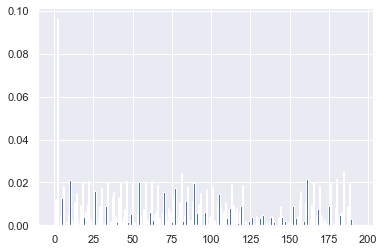

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
 
data = df1.copy(deep=True)
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
standardized_data = Standardize(data, method="Gaussian")
X = data.drop(axis=1, labels =["ROW", "Final_IG", "Date"])
y = X.pop("B_PLUS_FLAG")
 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [20]:
# BASE MODEL ACCURACY WITH ALL FEATURES 
print("Accuracy with ALL features")

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
data = df1.copy(deep=True)

# Pre-process data 
standardized_data = Standardize(data, method="Gaussian")
X = standardized_data.drop(axis=1, labels =["ROW", "Final_IG", "Date"])
y = X.pop("B_PLUS_FLAG")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# fit the model
model = DecisionTreeClassifier(max_depth=8)
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))b

Accuracy with ALL features
Accuracy: 86.61


In [21]:
# feature selection
print("Accuracy with SUBSET of features")
def select_features(X_train, y_train, X_test):
  # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_classif, k=50)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data 
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# load the dataset
data = df1.copy(deep=True)

# Pre-process data 
standardized_data = Standardize(data, method="Gaussian")
X = standardized_data.drop(axis=1, labels =["ROW", "Final_IG", "Date"])
y = X.pop("B_PLUS_FLAG")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# fit the model
model = LogisticRegression()
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy with SUBSET of features
Accuracy: 86.41


In [22]:
# Top 50 features
fs.get_feature_names_out()

array(['CUSTOMER_ID', 'EBITDA_Y2', 'EBITDA_Y3', 'TOTALASSET_Y3',
       'TOTALDEBT_Y3', 'TOTALREVENUE_Y3', 'CURRENTASSET_Y2',
       'CURRENTASSET_Y3', 'FIXEDASSET_Y3', 'CURRENTLIABILITY_Y3',
       'NONCURRLIA_Y2', 'NONCURRLIA_Y3', 'TOTALEQUITY_Y2',
       'TOTALEQUITY_Y3', 'TOTALNETWORTH_Y3', 'CAPITALIZATION_Y3',
       'TOTINTEXP_Y3', 'LEASERENTEXP_Y3', 'EBITDAR_Y3',
       'receivabledays_Y3', 'INVENTORYDAYS_Y3', 'payableDAYS_Y3',
       'tangibleNetWorth_Y2', 'tangibleNetWorth_Y3', 'FIXEDCHARGECOV_Y2',
       'FIXEDCHARGECOV_Y3', 'DEBTSERVCOV_Y2', 'DEBTSERVCOV_Y3',
       'NETPROFIT_Y3', 'NETSALES_Y2', 'NETSALES_Y3', 'ASSETTURNOVER_Y3',
       'OPERPROFIT_Y2', 'OPERPROFIT_Y3', 'ARTurnover_Y2', 'ARTurnover_Y3',
       'Inventory_Y3', 'RETAINED_EARNINGS_Y3', 'FCF_Y2', 'CCE_Y3',
       'Total_Leverage_Y2', 'Total_Leverage_Y3', 'Ebitda_Margin_Y2',
       'Ebitda_Margin_Y3', 'Operating_Margin_Y3', 'Interest_CR_Y3',
       'Current_Ratio_Y3', 'Quick_Ratio_Y3', 'Debt_Ratio_Y3',
       'R

## Univariate Selection - Chi-Squared, F_Classification, Mutual Information

In [30]:
# Gather train and test sets to work with

from sklearn.model_selection import train_test_split

X1 = df1.loc[:, ~df1.columns.isin(['Final_IG', 'B_PLUS_FLAG', 'ROW','Corp_Residence_Country_Code','BR Code','Period','CUSTOMER_ID','Final_IG','B_PLUS_FLAG', 'Date'])]
y1 = df1['B_PLUS_FLAG']

normalized_X1=(X1-X1.min())/(X1.max()-X1.min())

X1_train, X1_test, y1_train, y1_test = train_test_split(normalized_X1, y1, test_size=0.2, random_state=0)

X2 = df2.loc[:, ~df2.columns.isin(['Final_IG', 'B_PLUS_FLAG', 'ROW','Corp_Residence_Country_Code','BR Code','Period','CUSTOMER_ID','Final_IG','B_PLUS_FLAG', 'Date'])]
y2 = df2['B_PLUS_FLAG']

normalized_X2=(X2-X2.min())/(X2.max()-X2.min())

X2_train, X2_test, y2_train, y2_test = train_test_split(normalized_X2, y2, test_size=0.2, random_state=0)

In [31]:
# Univariate Feature Selection: chi^2

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X1_uni = abs(X1)

#apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X1_uni,y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1_uni.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

df1features = featureScores.nlargest(20,'Score')

X2_uni = abs(X2)

#apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X2_uni,y2)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X2_uni.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

df2features = featureScores.nlargest(20,'Score')

                     Features         Score
137  payableDAYS_3YearAverage  1.747609e+10
67             payableDAYS_Y3  2.309515e+07
113                    FCF_Y2  8.340283e+06
149          FCF_3YearAverage  6.546795e+06
59          receivabledays_Y3  5.809089e+06
110      RETAINED_EARNINGS_Y3  5.723434e+06
106              Inventory_Y3  5.144747e+06
117                    CCE_Y3  5.102931e+06
35             TOTALEQUITY_Y3  4.869072e+06
102             ARTurnover_Y3  4.599547e+06
47               TOTINTEXP_Y3  4.538652e+06
11               TOTALDEBT_Y3  4.033218e+06
62           INVENTORYDAYS_Y2  1.935372e+06
63           INVENTORYDAYS_Y3  1.812563e+06
186      Average_Total_Assets  5.896626e+05
111                    FCF_Y0  4.474665e+05
78          FIXEDCHARGECOV_Y3  3.869375e+05
112                    FCF_Y1  3.519198e+05
82             DEBTSERVCOV_Y3  3.467614e+05
66             payableDAYS_Y2  2.372545e+05
                        Features         Score
106                 INVENTORY

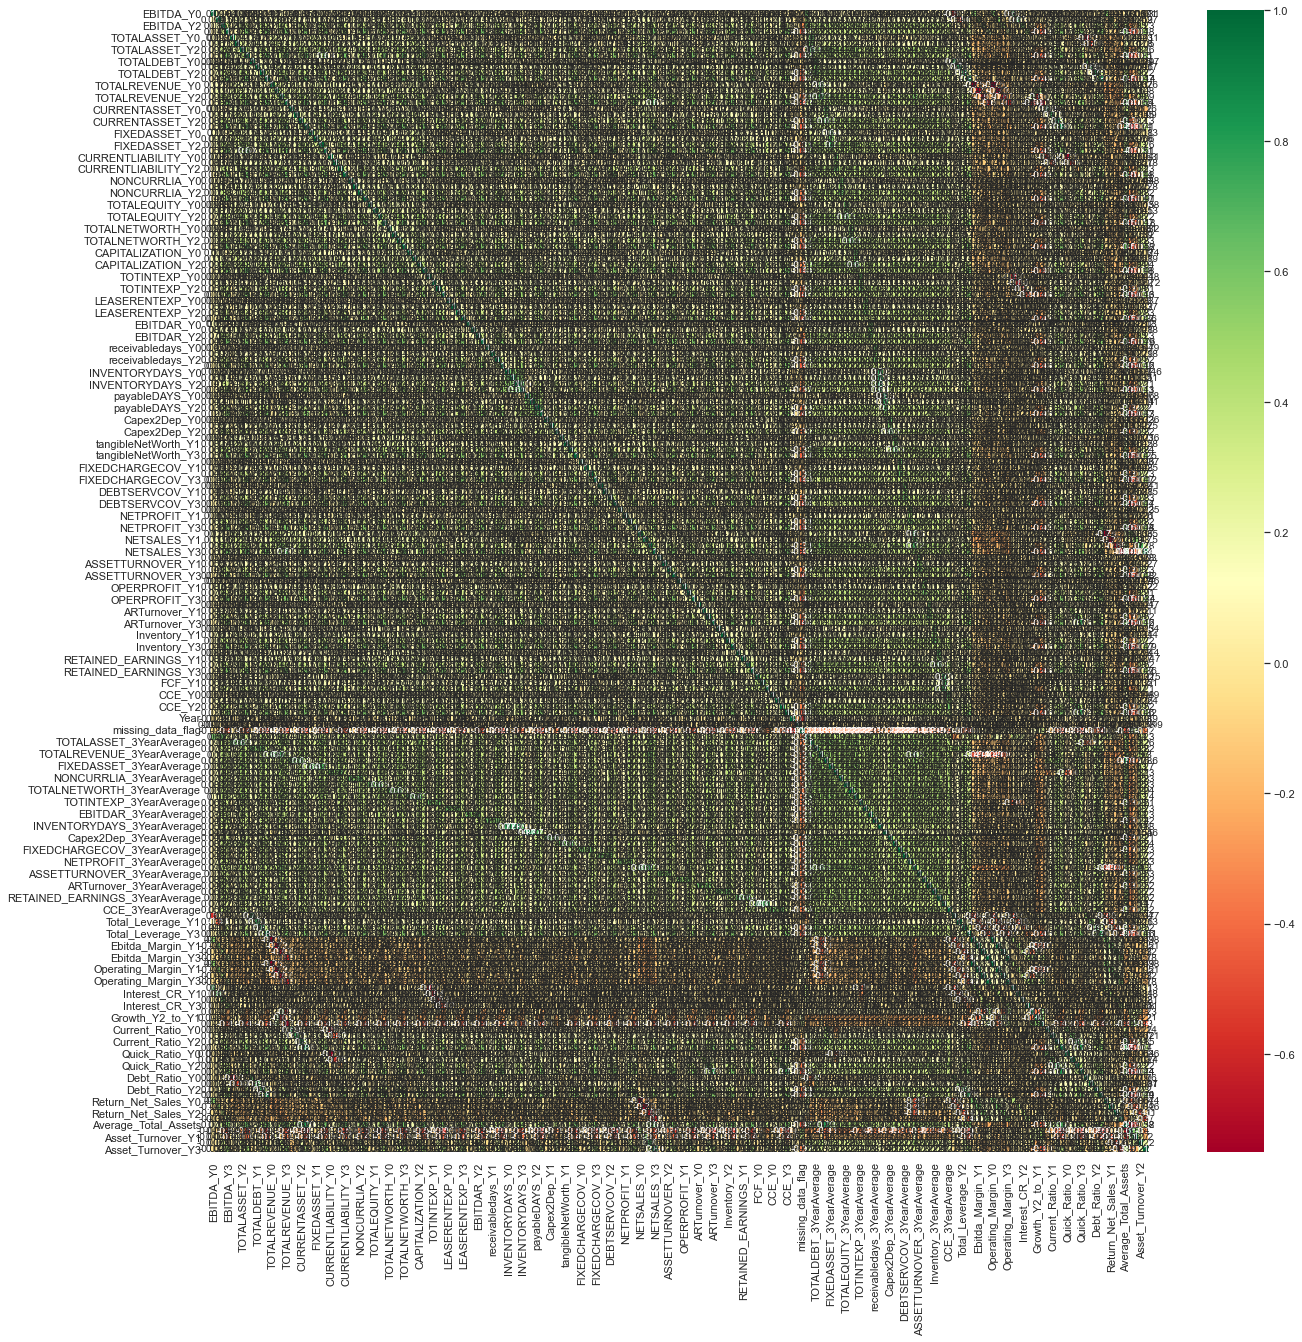

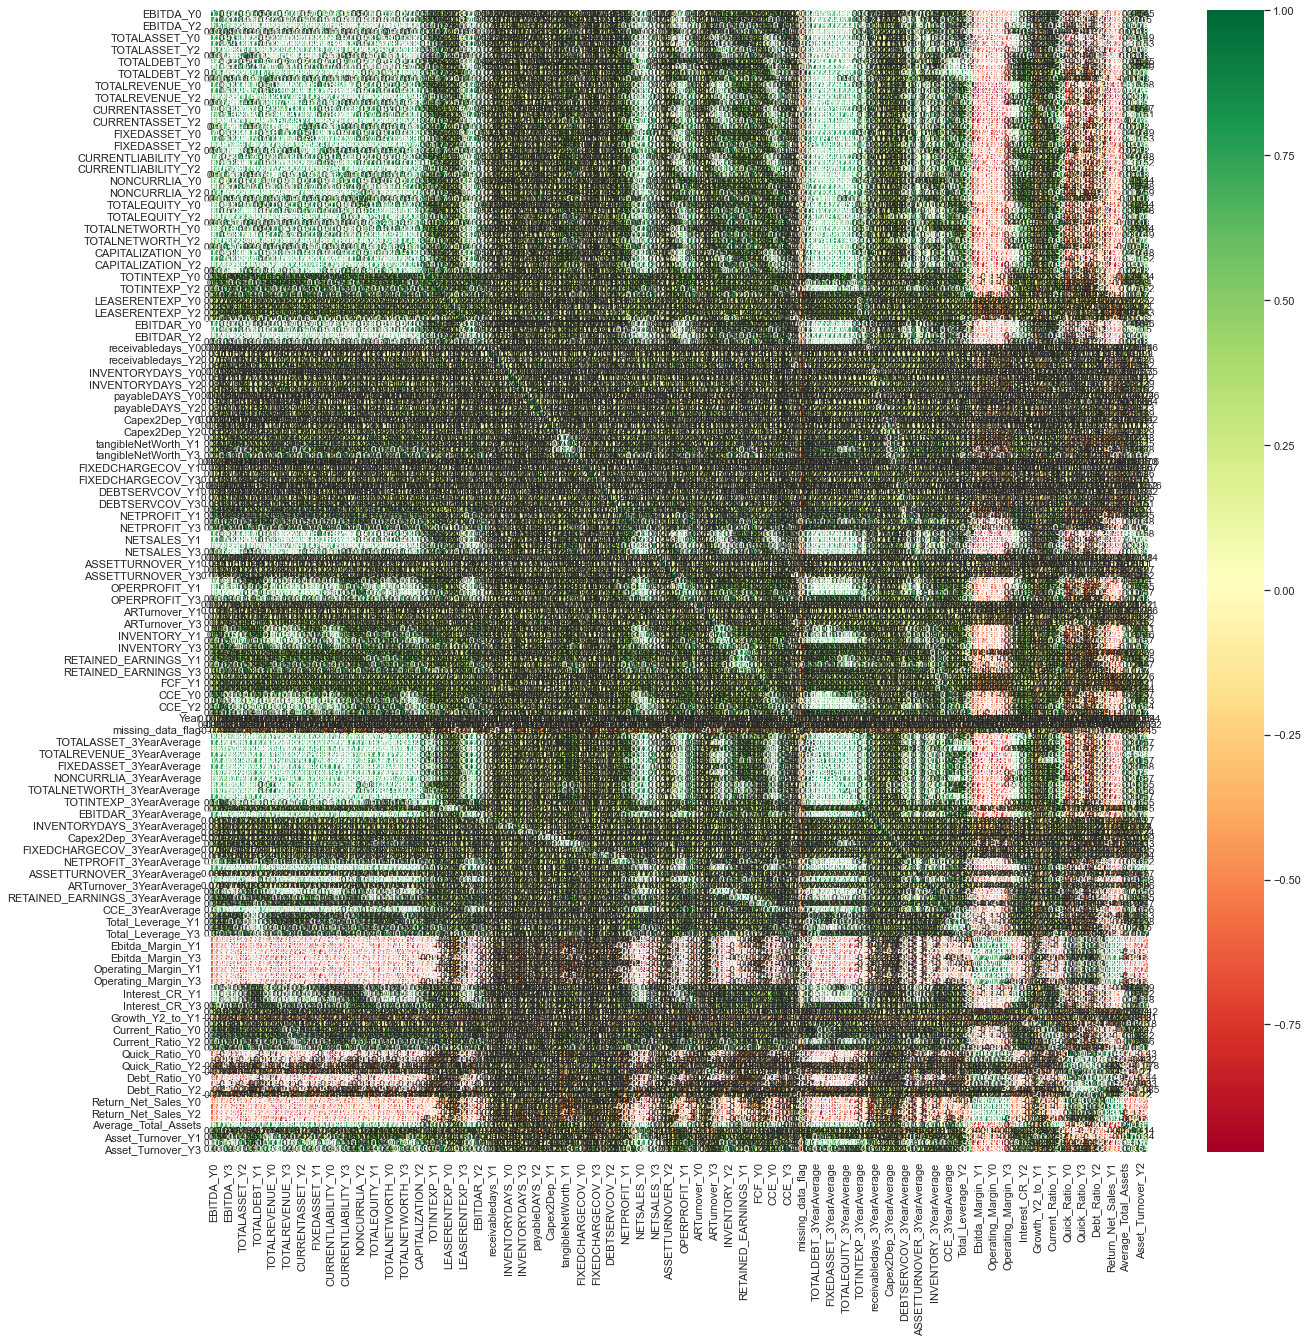

In [33]:
import seaborn as sns

# too many columns in the dataset, so using the top 20 columns found using univariate selection
# df1_columns = df1features['Features'].values.tolist() + ['B_PLUS_FLAG']

# X = df1_simple.loc[:, df1_columns]

#get correlations of each features in dataset
corrmat = X1.corr(method='spearman')
top_corr_features = corrmat.index
plt.figure(figsize=(21,21))
# # plot heat map
g=sns.heatmap(X1[top_corr_features].corr(method='spearman'),annot=True,cmap="RdYlGn")

# too many columns in the dataset, so using the top 20 columns found using univariate selection
df2_columns = df2features['Features'].values.tolist() + ['B_PLUS_FLAG']

# X2 = df2_simple.loc[:, df2_columns]
#get correlations of each features in dataset
corrmat = X2.corr(method='spearman')
top_corr_features = corrmat.index
plt.figure(figsize=(21,21))
#plot heat map
g=sns.heatmap(X2[top_corr_features].corr(method='spearman'),annot=True,cmap="RdYlGn")

As we can see, there is an abundance of highly co-related features in our data. 

## Feature Selection using RFE

In [53]:
# Feature selection using RFE

from sklearn.feature_selection import RFE

model1 = DecisionTreeClassifier()
rfe1 = RFE(model1, n_features_to_select=30)
fit1 = rfe1.fit(X1_train, y1_train)
print("Num Features: %s" % (fit1.n_features_))
print("Selected Features: %s" % (fit1.support_))
print("Feature Ranking: %s" % (fit1.ranking_))

Num Features: 30
Selected Features: [ True False False False False False False False  True False False False
 False False False False False False False False  True  True False False
 False False False False  True  True False False  True False False False
  True  True False False  True False False False  True False False False
 False  True False False False False False False  True False False False
 False False False False False False False False  True False False  True
 False False False False False False False False False False False  True
  True False False  True False False False  True False False False  True
 False False False False False False False  True  True False False  True
 False False False  True False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False  True False  True False
 False False False False False False False False False False False False
 False False Fa

In [55]:
# Top 30 features from here
selected_features1 = X1_train.loc[:,fit1.support_].columns
selected_features1 

Index(['EBITDA_Y0', 'TOTALDEBT_Y0', 'FIXEDASSET_Y0', 'FIXEDASSET_Y1',
       'NONCURRLIA_Y0', 'NONCURRLIA_Y1', 'TOTALEQUITY_Y0', 'TOTALNETWORTH_Y0',
       'TOTALNETWORTH_Y1', 'CAPITALIZATION_Y0', 'TOTINTEXP_Y0',
       'LEASERENTEXP_Y1', 'receivabledays_Y0', 'Capex2Dep_Y0',
       'tangibleNetWorth_Y0', 'NETPROFIT_Y0', 'NETPROFIT_Y1', 'NETSALES_Y0',
       'ASSETTURNOVER_Y0', 'OPERPROFIT_Y0', 'Inventory_Y0', 'Inventory_Y1',
       'RETAINED_EARNINGS_Y0', 'FCF_Y0', 'CCE_Y0', 'payableDAYS_3YearAverage',
       'FIXEDCHARGECOV_3YearAverage', 'NETPROFIT_3YearAverage',
       'Quick_Ratio_Y0', 'Return_Net_Sales_Y1'],
      dtype='object')

Nearly a 10% accuracy increase after feature selection!

## Feature Selection with Random Forest Feature Importance 

In [ ]:
# Feature Selection using RFE with Random Forest (Task 1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# model = LogisticRegression()
modelrf1 = RandomForestClassifier(max_depth = 3, random_state=0)
rferf1 = RFE(modelrf1, n_features_to_select=50)
fitrf1 = rferf1.fit(X1_train, y1_train)
print("Num Features: %s" % (fitrf1.n_features_))
print("Selected Features: %s" % (fitrf1.support_))
print("Feature Ranking: %s" % (fitrf1.ranking_))

selected_featuresrf1 = X1_train.loc[:,fitrf1.support_].columns
selected_featuresrf1 

X1_newtrain = X1_train.loc[:, X1_train.columns.isin(selected_featuresrf1)]
X1_newtest = X1_test.loc[:, X1_test.columns.isin(selected_featuresrf1)]

classifier = DecisionTreeClassifier()
classifier.fit(X1_newtrain, y1_train)

# Predicting the Test set results
y1_pred = classifier.predict(X1_newtest)

cm = confusion_matrix(y1_test, y1_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y1_test, y1_pred)))

modelrf2 = RandomForestClassifier(max_depth=3, random_state=0)
rferf2 = RFE(modelrf2, n_features_to_select=50)
fitrf2 = rferf2.fit(X2_train, y2_train)
print("Num Features: %s" % (fitrf2.n_features_))
print("Selected Features: %s" % (fitrf2.support_))
print("Feature Ranking: %s" % (fitrf2.ranking_))

selected_featuresrf2 = X2_train.loc[:,fitrf2.support_].columns
selected_featuresrf2

X2_newtrain = X2_train.loc[:, X2_train.columns.isin(selected_featuresrf2)]
X2_newtest = X2_test.loc[:, X2_test.columns.isin(selected_featuresrf2)]

classifier = DecisionTreeClassifier()
classifier.fit(X2_newtrain, y2_train)

# Predicting the Test set results
y2_pred = classifier.predict(X2_newtest)

cm = confusion_matrix(y2_test, y2_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y2_test, y2_pred)))

## Feature Selection with XGBoost

In [90]:
data1 = df1.copy(deep=True)
data2 = df2.copy(deep=True)

In [91]:
from numpy import sort
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [92]:
data1

ROW  Corp_Residence_Country_Code  BR Code  CUSTOMER_ID  Final_IG  \
0       5662                            1        5         1576         5   
1      16369                            1        5         4545         7   
2       2326                            0       12          648         8   
3      38131                            0       19        13395         5   
4      36605                            0       19        12998         6   
...      ...                          ...      ...          ...       ...   
28219   4906                            0        3         1357         4   
28220  14151                            0       32         3969         8   
28221   4302                            0        4         1190        12   
28222  33510                            1        5        11429         3   
28223   3971                            0        2         1097         9   

       B_PLUS_FLAG      EBITDA_Y0      EBITDA_Y1      EBITDA_Y2  \
0                1  575863.911214  602838.635998  583646.469630   
1                1  599469.364624  615373.028208  612705.047096   
2                1  613829.072017  575020.270272  583630.783425   
3                1  585059.299344  581915.869330  594033.887481   
4                1  605966.227164  593540.797737  575448.556931   
...            ...            ...            ...            ...   
28219            1  634083.805367  596560.877037  585727.302685   
28220            1  599167.455873  606599.776848  584777.909011   
28221            0  585833.702024  600921.790966  613953.083276   
28222            1  614960.631181  629560.585953  601757.595313   
28223            0  593313.219804  610231.301363  622599.657205   

           EBITDA_Y3  TOTALASSET_Y0  TOTALASSET_Y1  TOTALASSET_Y2  \
0      614602.866245  619611.510181  621095.725446  611355.907673   
1      512031.899430  608126.531748  601435.154115  587550.520995   
2      595256.346525  608391.483917  611859.108037  607825.470188   
3      609965.034011  591791.219692  598332.776102  589877.849288   
4      512031.899430  582546.955793  614212.207680  578068.515601   
...              ...            ...            ...            ...   
28219  591395.579503  651655.726049  652947.572375  668755.355884   
28220  586553.074483  628492.484307  589170.939484  587262.827605   
28221  624665.046233  594550.303034  637426.226898  622339.874197   
28222  512031.899430  588957.530051  625891.648956  627935.849247   
28223  599372.412872  615956.219294  609615.367061  597757.756933   

       TOTALASSET_Y3   TOTALDEBT_Y0   TOTALDEBT_Y1   TOTALDEBT_Y2  \
0      582433.004400  623105.791017  596800.177680  600460.033208   
1      508218.086643  627335.355343  611300.879046  572542.268654   
2      592953.319963  585464.960100  571781.269380  585642.496712   
3      622230.836194  584513.060799  626767.691011  625743.779183   
4      508218.086643  590177.329836  570997.852457  625971.749956   
...              ...            ...            ...            ...   
28219  668563.133408  604023.768218  613101.034111  573580.224400   
28220  611224.605705  588182.534259  587104.404583  618815.493500   
28221  598808.830619  606861.329195  590705.791994  632459.762414   
28222  508218.086643  598960.345874  570916.524257  579122.970097   
28223  617733.153594  593552.800805  586342.984315  614837.524144   

        TOTALDEBT_Y3  TOTALREVENUE_Y0  TOTALREVENUE_Y1  TOTALREVENUE_Y2  \
0      598408.339905    611355.411490    589592.109008    605336.777910   
1           0.000000    604626.757034    586282.226249    624691.726730   
2      593575.189122    608591.366569    578175.200440    602523.843620   
3      573802.856646    615999.168162    588623.823558    600443.812695   
4           0.000000    607879.645878    628042.392612    592671.553802   
...              ...              ...              ...              ...   
28219  615506.802225    615404.405921    613017.825392    653248.641252   
28220  610036.723602 

In [93]:
non_financial_features = ['ROW','Corp_Residence_Country_Code', 'BR Code', 'CUSTOMER_ID', 'Final_IG', 'B_PLUS_FLAG', 'Year', 'Month', 'Date', 'missing_data_flag' ]
financial_features = data1.drop(non_financial_features, axis=1)
fin_features_lst = list(financial_features.columns)

In [105]:
def Standardize(xtrain, xtest, method):
    """ The following function takes in the given dataset, and standardizes it based on the given method."""
    
    if method == "Gaussian":
        std_scaler = StandardScaler()
        xtrain = xtrain.apply(lambda x: std_scaler.fit_transform(x) if x.name in fin_features_lst else x)
        xtest = xtest.apply(lambda x: std_scaler.transform(x) if x.name in fin_features_lst else x)

    if method == "Normalize":
        norm_scaler = MinMaxScaler()
        for col in xtrain.columns:
          if col in fin_features_lst:
            xtrain[col]= norm_scaler.fit_transform(xtrain[col].values.reshape(-1,1))
          else:
            pass
        
        for col in xtest.columns:
          if col in fin_features_lst:
            xtest[col]= norm_scaler.transform(xtest[col].values.reshape(-1,1))
          else:
            pass        

    if method == "Robust":
        robust_scaler = RobustScaler()
        xtrain = xtrain.apply(lambda x: robust_scaler.fit_transform(x) if x.name in fin_features_lst else x)
        xtest = xtest.apply(lambda x: robust_scaler.transform(x) if x.name in fin_features_lst else x)
        
    return xtrain, xtest 

In [101]:
from numpy import sort
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# LGBM
from sklearn.preprocessing import MinMaxScaler
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import RandomizedSearchCV


In [96]:
all_features = data1
all_targets = data1.pop("B_PLUS_FLAG")
X_train, X_test, train_targets, test_targets = train_test_split(all_features, all_targets, test_size=0.15, stratify=all_targets, random_state=2022)

In [106]:
X_train

ROW  Corp_Residence_Country_Code  BR Code  CUSTOMER_ID  Final_IG  \
17375  11413                            0        3         3171         4   
27832  37353                            0        3        13201         6   
13830  18079                            0       13         4996        10   
1158    8168                            0       14         2271         8   
11204   8978                            0       12         2504         8   
...      ...                          ...      ...          ...       ...   
9657    3184                            0        4          878         7   
10993  15203                            0       11         4235         6   
11489  16060                            1        5         4449         4   
13674  32938                            1        5        10984         8   
19800  31655                            0       35        10124         4   

           EBITDA_Y0      EBITDA_Y1      EBITDA_Y2      EBITDA_Y3  \
17375  586495.371025  616048.696607  585726.770009  581719.020633   
27832  620015.209119  588303.082026  617928.264808  593258.173680   
13830  624293.620862  607299.503853  579704.171728  623795.600020   
1158   622112.004358  608231.267096  590169.754528  622289.659509   
11204  578532.309926  576629.183000  594092.301214  573166.509794   
...              ...            ...            ...            ...   
9657   628002.965653  619558.316718  601747.950483  626663.287805   
10993  659865.345669  660300.228019  660219.243225  512031.899430   
11489  592825.446928  621550.744696  576116.426280  608318.335507   
13674  577666.077544  603915.402593  609872.843968  512031.899430   
19800  611561.722919  611991.563279  584083.021885  599266.911843   

       TOTALASSET_Y0  TOTALASSET_Y1  TOTALASSET_Y2  TOTALASSET_Y3  \
17375  597800.676543  583010.702912  604106.460076  612565.048949   
27832  627854.208854  581806.365808  609990.518712  596726.811308   
13830  625651.949843  581989.302369  578606.392703  623867.178856   
1158   621636.995054  623458.314546  592559.169530  601744.059386   
11204  607666.558320  616302.326039  574663.850302  601424.199699   
...              ...            ...            ...            ...   
9657   630435.510591  608836.327206  611501.924731  596005.580554   
10993  670224.682141  670183.997079  668755.355884  508218.086643   
11489  611665.978505  580830.022664  627348.023359  578842.010357   
13674  594069.667662  594296.861013  598708.400248  508218.086643   
19800  621104.540724  629609.167721  575167.369204  608842.770639   

        TOTALDEBT_Y0   TOTALDEBT_Y1   TOTALDEBT_Y2   TOTALDEBT_Y3  \
17375  624794.347074  617279.857135  611494.835390  575979.918045   
27832  590146.741422  606780.345216  569107.723951  591137.603995   
13830  617573.047998  626934.150178  606548.228724  583859.621280   
1158   622831.779542  592216.415273  605464.647907  591998.865511   
11204  630545.760936  574305.505068  591397.261525  615825.680663   
...              ...            ...            ...            ...   
9657   612988.066759  586972.869309  614118.383902  569187.133742   
10993  662407.603480  662643.225746  662153.593914       0.000000   
11489  572177.556647  619544.931766  624764.633184  583959.828481   
13674  599305.277828  606028.409771  627164.360534       0.000000   
19800  570484.999523  626594.534323  575251.155905  575959.550217   

       TOTALREVENUE_Y0  TOTALREVENUE_Y1  TOTALREVENUE_Y2  TOTALREVENUE_Y3  \
17375    615856.903010    573132.492948    587795.606658    623811.788510   
27832    583193.758031    630002.517410    621731.146933    607247.253800   
13830    604054.019624    584831.725044    571549.344386    616529.204999   
1158     614203.932156    612923.370980    606098.071033    629947.117727   
11204    581585.732830    618768.392903    620645.033602    600421.816574   
...                ...              ...              ...              ...   
9657     631302.023539    615003.617946    580820.671079  

In [108]:

X_train, X_test, train_targets, test_targets = train_test_split(all_features, all_targets, test_size=0.15, stratify=all_targets, random_state=2022)
X_train, X_test = Standardize(X_train, X_test, method="Normalize")

In [113]:
X_train = X_train.drop(axis=1, labels =["ROW", "Final_IG", "Date"])
X_test = X_test.drop(axis=1, labels =["ROW", "Final_IG", "Date"])
X_train

Corp_Residence_Country_Code  BR Code  CUSTOMER_ID  EBITDA_Y0  \
17375                            0        3         3171   0.392376   
27832                            0        3        13201   0.669975   
13830                            0       13         4996   0.705407   
1158                             0       14         2271   0.687340   
11204                            0       12         2504   0.326428   
...                            ...      ...          ...        ...   
9657                             0        4          878   0.736127   
10993                            0       11         4235   1.000000   
11489                            1        5         4449   0.444799   
13674                            1        5        10984   0.319255   
19800                            0       35        10124   0.599966   

       EBITDA_Y1  EBITDA_Y2  EBITDA_Y3  TOTALASSET_Y0  TOTALASSET_Y1  \
17375   0.642678   0.432299   0.471140       0.439783       0.343491   
27832   0.418638   0.677704   0.549154       0.672254       0.334421   
13830   0.572030   0.386401   0.755611       0.655219       0.335798   
1158    0.579554   0.466158   0.745429       0.624163       0.648105   
11204   0.324374   0.496052   0.413318       0.516098       0.594213   
...          ...        ...        ...            ...            ...   
9657    0.671018   0.554395   0.774998       0.692221       0.537986   
10993   1.000000   1.000000   0.000000       1.000000       1.000000   
11489   0.687106   0.359059   0.650972       0.547035       0.327068   
13674   0.544704   0.616314   0.000000       0.410923       0.428488   
19800   0.609918   0.419772   0.589777       0.620044       0.694428   

       TOTALASSET_Y2  TOTALASSET_Y3  TOTALDEBT_Y0  TOTALDEBT_Y1  TOTALDEBT_Y2  \
17375       0.534748       0.650765      0.699466      0.644222      0.624578   
27832       0.577093       0.551989      0.422628      0.561876      0.310455   
13830       0.351235       0.721251      0.641767      0.719939      0.587919   
1158        0.451647       0.583279      0.683785      0.447653      0.579889   
11204       0.322862       0.581285      0.745420      0.307180      0.475638   
...              ...            ...           ...           ...           ...   
9657        0.587970       0.547491      0.605132      0.406528      0.644020   
10993       1.000000       0.000000      1.000000      1.000000      1.000000   
11489       0.702008       0.440450      0.279052      0.661986      0.722918   
13674       0.495901       0.000000      0.495805      0.555978      0.740701   
19800       0.326485       0.627551      0.265528      0.717275      0.355983   

       TOTALDEBT_Y3  TOTALREVENUE_Y0  TOTALREVENUE_Y1  TOTALREVENUE_Y2  \
17375      0.870782         0.570131         0.264361         0.418598   
27832      0.893698         0.326701         0.685982         0.655853   
13830      0.882695         0.482167         0.351096         0.305015   
1158       0.895000         0.557812         0.559361         0.546557   
11204      0.931022         0.314717         0.602695         0.648259   
...             ...              ...              ...              ...   
9657       0.860513         0.685240         0.574784         0.369834   
10993      0.000000         1.000000         1.000000         1.000000   
11489      0.882846         0.620437         0.394043         0.734045   
13674      0.000000         0.566920         0.324876         0.695594   
19800      0.870751         0.269433         0.637506         0.593273   

       TOTALREVENUE_Y3  CURRENTASSET_Y0  CURRENTASSET_Y1  CURRENTASSET_Y2  \
17375         0.723352         0.559880         0.674171         0.303455   
27832         0.625216         0.414932         0.586719         0.709662   
13830         0.680207         0.369115         0.582714         0.542027   
1158          0.759701         0.508650         0.595132         0.462367   
11204         0.584779         0.601988   

[23:12:25] WARNING: /private/var/folders/hc/rv0ch5hn293cmmlwhw7w_drh0000gn/T/pip-install-t7fafidw/xgboost_a67f8643a26e4ba0856649bd2b3555ba/build/temp.macosx-12-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.00638481 0.01030228 0.00787441 0.00666806 0.00447263 0.00340119
 0.00465338 0.00540431 0.00476681 0.0079346  0.00535413 0.00533076
 0.00570616 0.00414332 0.00576011 0.0053522  0.00509475 0.00649864
 0.00514858 0.0045559  0.00419658 0.00529556 0.00384532 0.00542386
 0.00417014 0.00493497 0.00527913 0.00475613 0.00483756 0.00502142
 0.00579933 0.00410837 0.00478912 0.00525346 0.0050163  0.00538586
 0.00498476 0.00490837 0.00575597 0.00500281 0.00498875 0.00518566
 0.00574371 0.00474879 0.00435156 0.00307852 0.00437743 0.00494474
 0.00546634 0.00373661 0.00417941 0.00466722 0.00564092 0

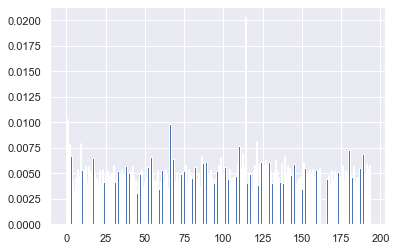

In [114]:
from xgboost import XGBClassifier
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(X_train, train_targets)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [139]:
len(importances)

194

In [140]:
importances = model.feature_importances_
important_ind = np.argsort(model.feature_importances_)[:100]
important_names = np.array(list(X_train))[important_ind]

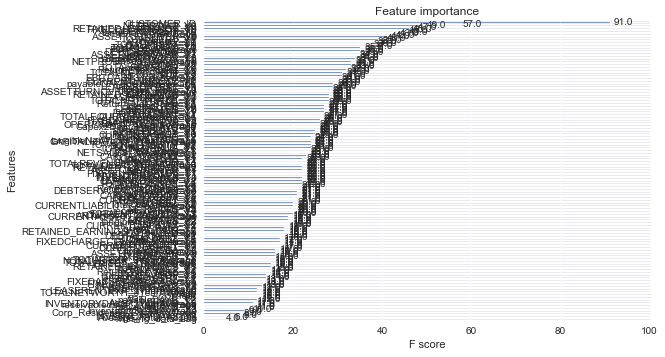

In [141]:
from xgboost import plot_importance
plot_importance(model)
pyplot.show()

In [142]:
important_ind

array([163, 162, 165, 164,  45,   5, 118,  59, 150,  65,  85,  49,  22,
       122, 115, 131,  94, 146, 138, 168,  31,  60,  13,  24,  50, 136,
        77,  20,  71,  56, 184,  69,  57,  62, 102, 147,  44,  46, 170,
       166, 175, 103,   4,  80,  95, 177,  93, 148, 105,  19,  83, 106,
       186, 182, 185,   6, 135, 188,  51,  88, 158, 144, 174,  43,  27,
       108,   8, 149, 181,  32,  79, 107, 167,  91,  28, 172,  99, 143,
        73,  90,  64,  37, 179,  25,  84,  47, 117,  72,  36,  40,  39,
       156, 153,  34,  29, 190, 140,  81,  55, 173])

In [143]:
# TOP 100 FEATURES 
important_names

array(['Operating_Margin_Y1', 'Operating_Margin_Y0',
       'Operating_Margin_Y3', 'Operating_Margin_Y2', 'CAPITALIZATION_Y2',
       'EBITDA_Y2', 'CCE_Y1', 'receivabledays_Y0',
       'Inventory_3YearAverage', 'INVENTORYDAYS_Y2', 'DEBTSERVCOV_Y3',
       'TOTINTEXP_Y2', 'CURRENTASSET_Y3', 'Month', 'FCF_Y1',
       'NONCURRLIA_3YearAverage', 'ASSETTURNOVER_Y0',
       'NETSALES_3YearAverage', 'receivabledays_3YearAverage',
       'Interest_CR_Y2', 'NONCURRLIA_Y0', 'receivabledays_Y1',
       'TOTALDEBT_Y2', 'FIXEDASSET_Y1', 'TOTINTEXP_Y3',
       'LEASERENTEXP_3YearAverage', 'tangibleNetWorth_Y3',
       'CURRENTASSET_Y1', 'Capex2Dep_Y0', 'EBITDAR_Y1', 'Debt_Ratio_Y3',
       'payableDAYS_Y2', 'EBITDAR_Y2', 'receivabledays_Y3',
       'ARTurnover_Y0', 'ASSETTURNOVER_3YearAverage', 'CAPITALIZATION_Y1',
       'CAPITALIZATION_Y3', 'Growth_Y3_to_Y2', 'Interest_CR_Y0',
       'Current_Ratio_Y2', 'ARTurnover_Y1', 'EBITDA_Y1',
       'FIXEDCHARGECOV_Y2', 'ASSETTURNOVER_Y1', 'Quick_Ratio_Y0',

In [145]:
# Save these top 100 feature names 
lst = list(important_names)
features_df = pd.DataFrame(lst)
features_df.to_excel("Top 100 Features.xlsx")